
import libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import  accuracy_score
import tensorflow as tf

In [2]:
tf.keras.backend.clear_session()

read dataset

In [3]:
data = pd.read_csv('model_new_01.csv')
data.head()

R1_1      R1_2      R1_3      R1_4      R1_5      R1_6      R3_1  \
0  0.001111  0.000219  0.000439  0.000362  0.000342  0.000650  0.000268   
1  0.001377  0.001184  0.001193  0.000865  0.000210  0.001131  0.001096   
2  0.000603  0.001458  0.001701  0.001461  0.000691  0.001315  0.000762   
3  0.000647  0.001622  0.001138  0.001645  0.000174  0.000324  0.000486   
4  0.000496  0.002436  0.001304  0.001717  0.000259  0.001168  0.001910   

       R3_2      R3_3      R3_4      R3_5      R3_6      R4_1      R4_2  \
0  0.000650  0.000537  0.000116  0.000094  0.000552  0.000920  0.001127   
1  0.000345  0.000496  0.000823  0.000070  0.000124  0.000499  0.000291   
2  0.000343  0.000061  0.000129  0.000610  0.000255  0.000404  0.000404   
3  0.000302  0.000255  0.000283  0.000259  0.000209  0.000935  0.000325   
4  0.000633  0.000451  0.000512  0.000406  0.000285  0.000265  0.000633   

       R4_3      R4_4      R4_5      R4_6  class  activity  
0  0.000246  0.000292  0.000431  0.001656      1  drilling  
1  0.000759  0.000554  0.001224  0.001280      1  drilling  
2  0.000598  0.001617  0.002922  0.001125      1  drilling  
3  0.001138  0.000907  0.002185  0.001153      1  drilling  
4  0.001719  0.000485  0.002365  0.001859      1  drilling

Data Visualization

<Axes: title={'center': 'Activity type'}, xlabel='activity'>

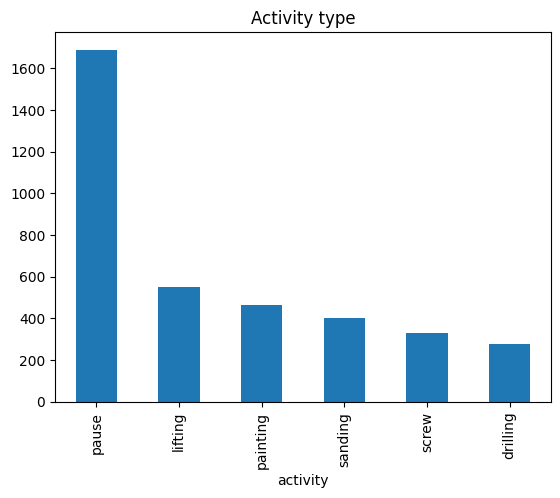

In [4]:
data['activity'].value_counts().plot(kind='bar', title='Activity type')

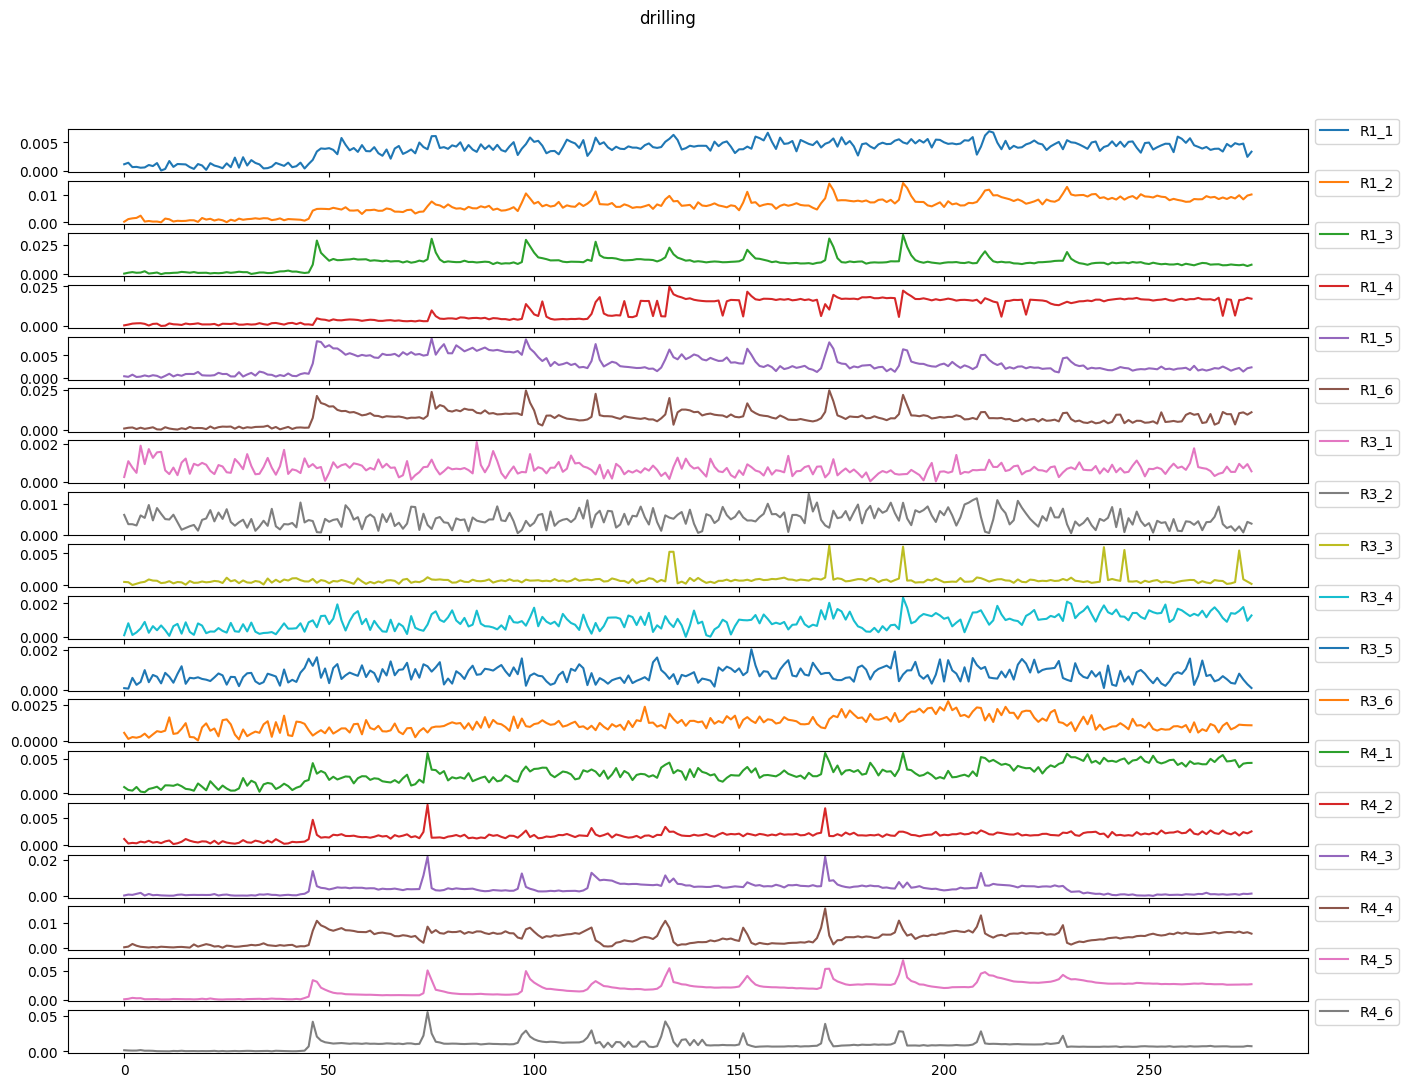

In [5]:
def plot_activity(activity, df):
    data = df[df['activity'] == activity][['R1_1', 'R1_2', 'R1_3', 'R1_4', 'R1_5', 'R1_6', 'R3_1', 'R3_2', 'R3_3', 'R3_4', 'R3_5', 'R3_6', 'R4_1', 'R4_2', 'R4_3', 'R4_4', 'R4_5', 'R4_6']]
    axis = data.plot(subplots=True, figsize=(16, 12), title=activity)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

plot_activity("drilling", data)

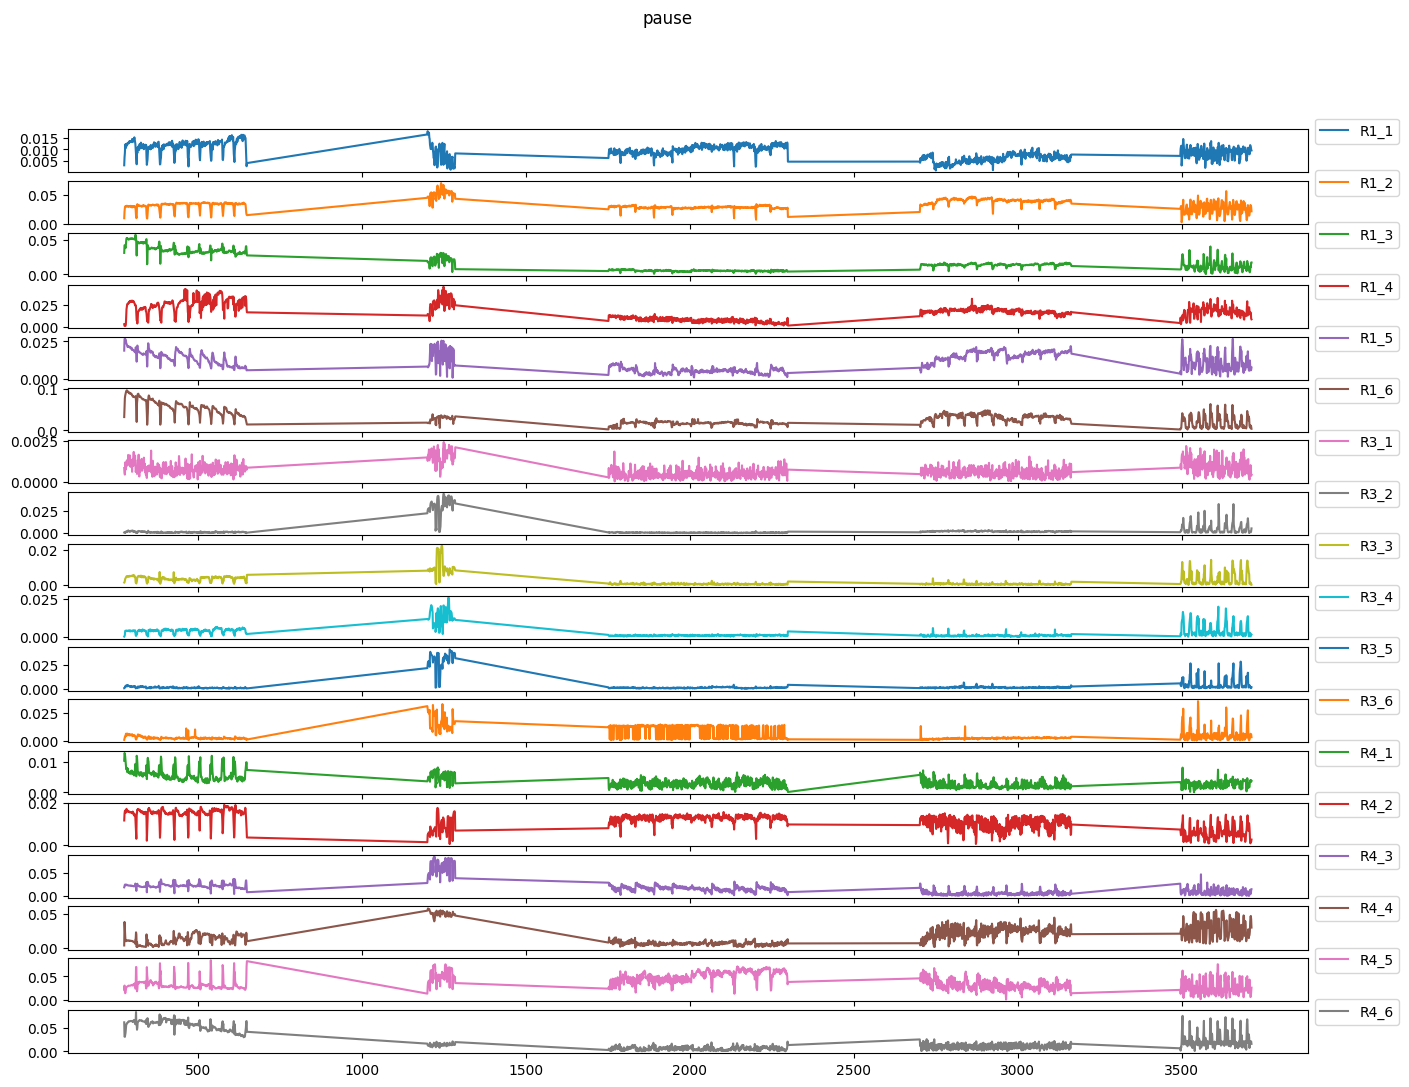

In [6]:
plot_activity("pause", data)

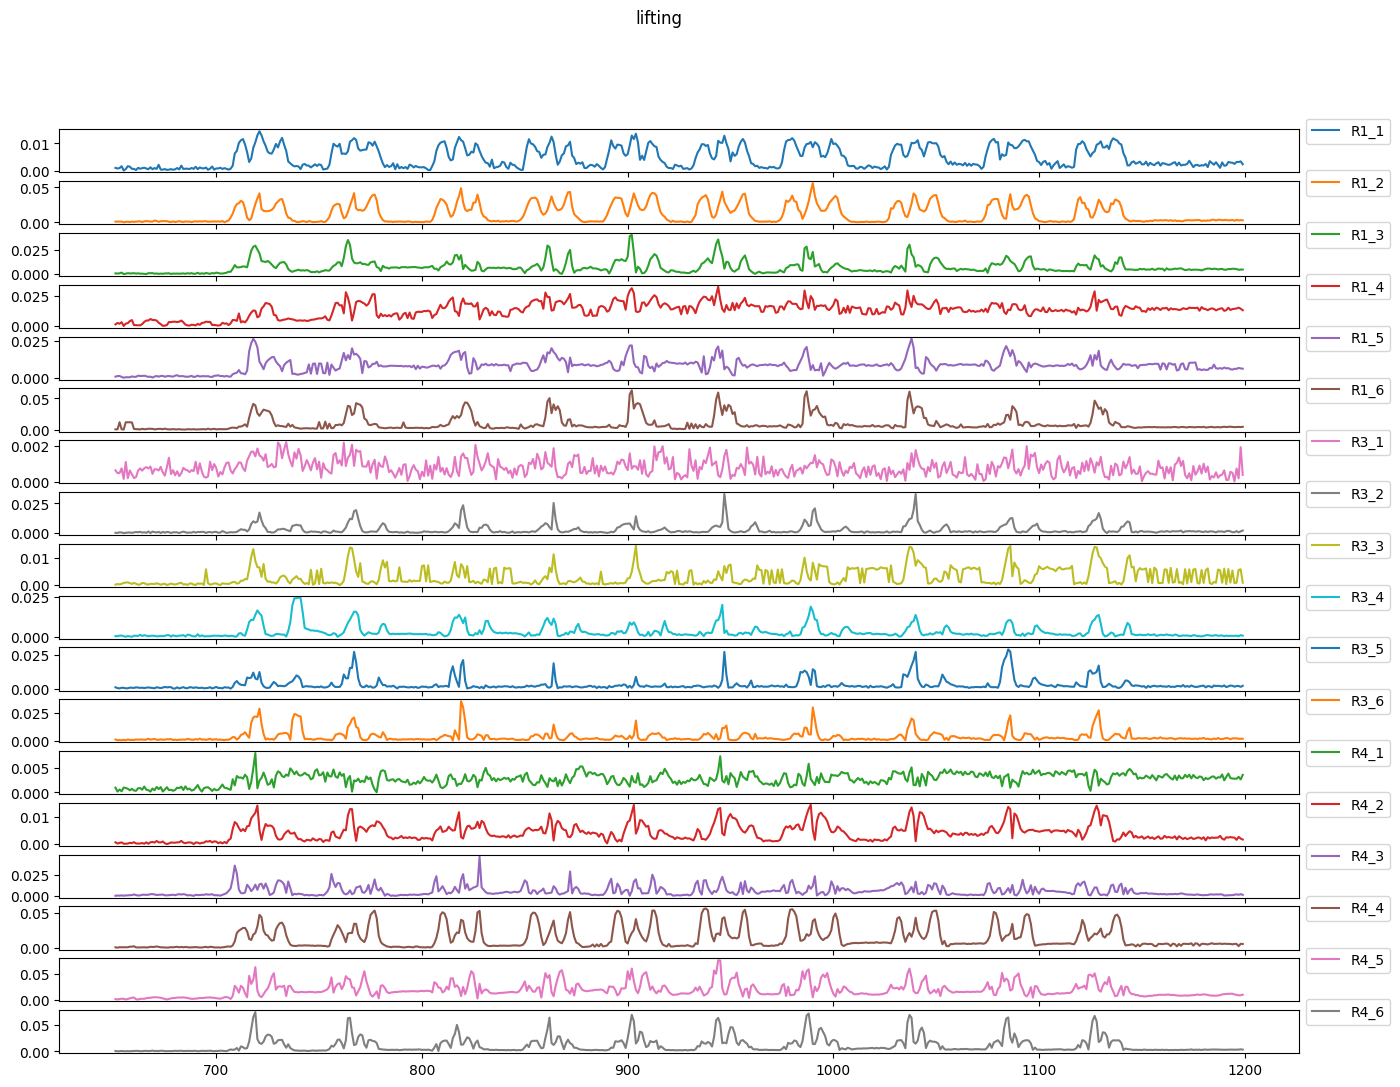

In [7]:
plot_activity("lifting", data)

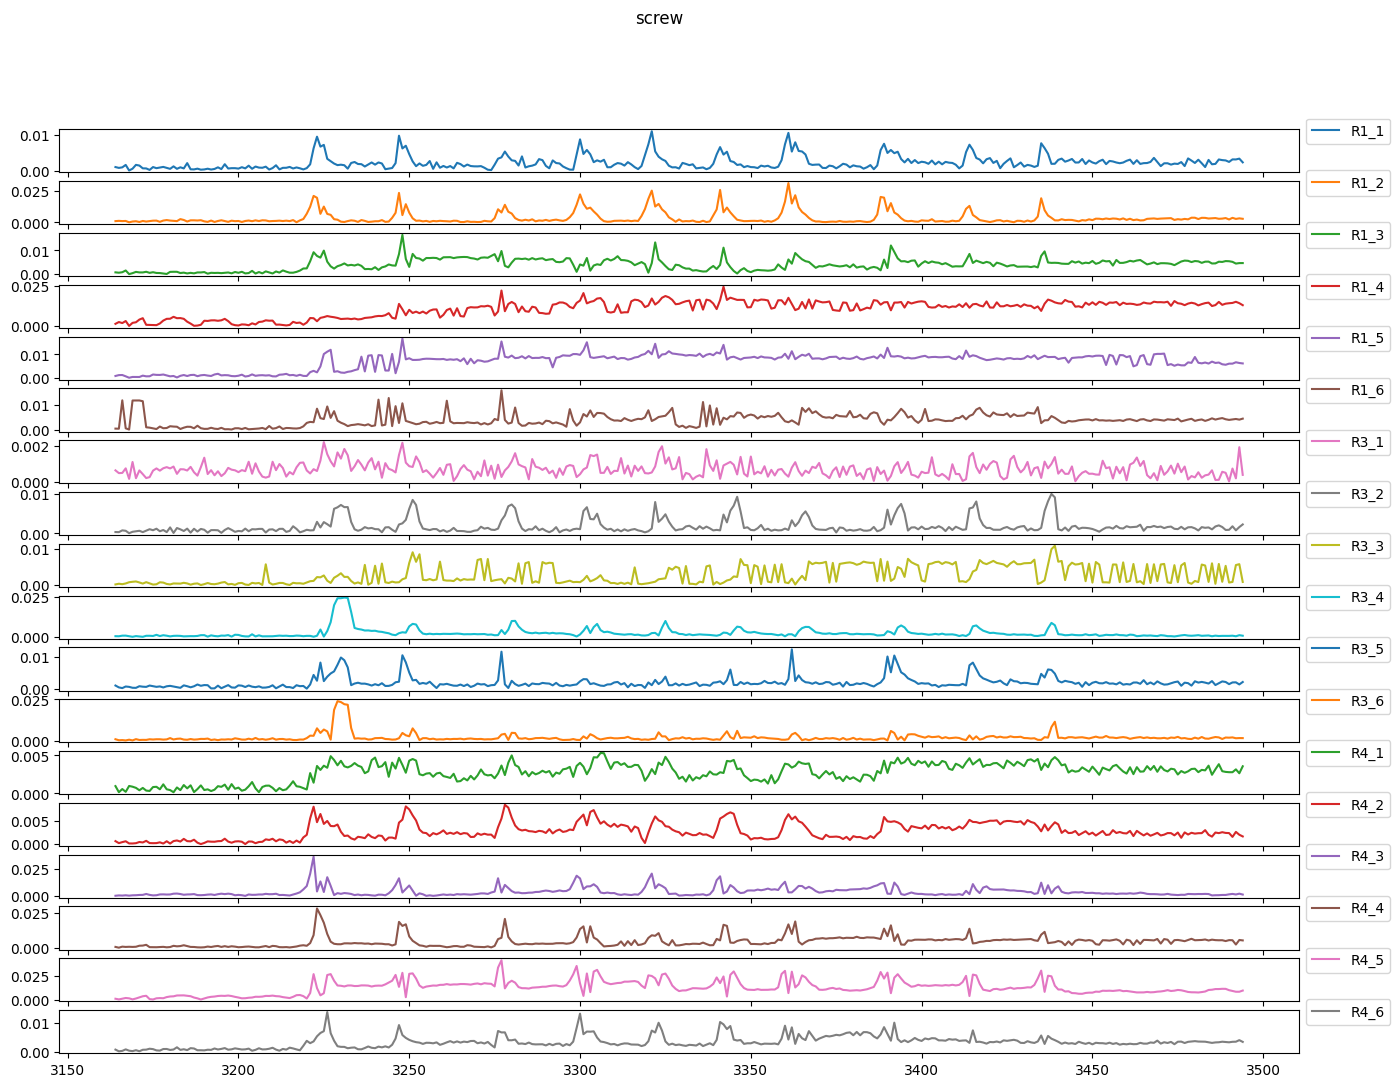

In [8]:
plot_activity("screw", data)

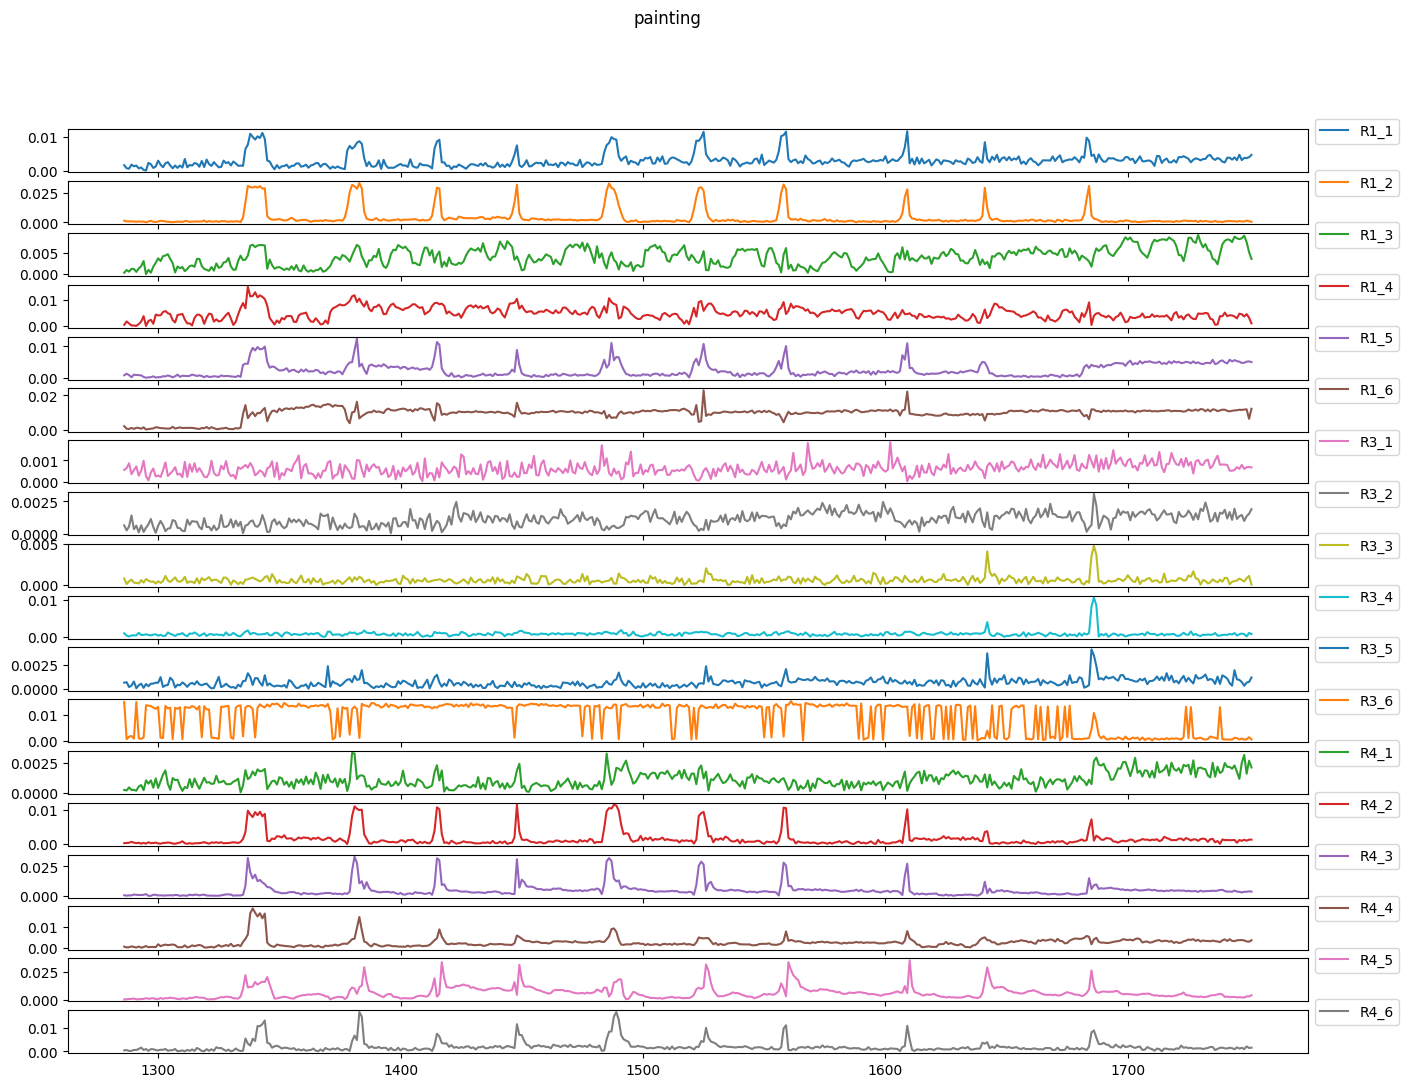

In [9]:
plot_activity("painting", data)

In [10]:
# plot_activity("sanding", data)

Preprocessing


In [11]:
X = data.drop(['class', 'activity'], axis=1)
y = data['class']
activity_labels = data['activity']
num_classes = 6

In [12]:
X

R1_1      R1_2      R1_3      R1_4      R1_5      R1_6      R3_1  \
0     0.001111  0.000219  0.000439  0.000362  0.000342  0.000650  0.000268   
1     0.001377  0.001184  0.001193  0.000865  0.000210  0.001131  0.001096   
2     0.000603  0.001458  0.001701  0.001461  0.000691  0.001315  0.000762   
3     0.000647  0.001622  0.001138  0.001645  0.000174  0.000324  0.000486   
4     0.000496  0.002436  0.001304  0.001717  0.000259  0.001168  0.001910   
...        ...       ...       ...       ...       ...       ...       ...   
3708  0.011857  0.025906  0.005108  0.013858  0.009041  0.006487  0.000365   
3709  0.011384  0.032627  0.012213  0.016018  0.007145  0.012392  0.001012   
3710  0.011013  0.031374  0.010468  0.015968  0.005610  0.010468  0.000912   
3711  0.009989  0.029452  0.017029  0.009151  0.005996  0.009129  0.000358   
3712  0.009566  0.021852  0.017090  0.008398  0.007527  0.003874  0.000424   

          R3_2      R3_3      R3_4      R3_5      R3_6      R4_1      R4_2  \
0     0.000650  0.000537  0.000116  0.000094  0.000552  0.000920  0.001127   
1     0.000345  0.000496  0.000823  0.000070  0.000124  0.000499  0.000291   
2     0.000343  0.000061  0.000129  0.000610  0.000255  0.000404  0.000404   
3     0.000302  0.000255  0.000283  0.000259  0.000209  0.000935  0.000325   
4     0.000633  0.000451  0.000512  0.000406  0.000285  0.000265  0.000633   
...        ...       ...       ...       ...       ...       ...       ...   
3708  0.001509  0.001091  0.002300  0.001486  0.004433  0.003876  0.001187   
3709  0.001242  0.001449  0.000380  0.001731  0.006081  0.003671  0.000959   
3710  0.001041  0.000386  0.000854  0.000721  0.005674  0.003953  0.001790   
3711  0.002279  0.000824  0.001203  0.000553  0.005614  0.003386  0.001693   
3712  0.005441  0.000244  0.001565  0.001480  0.003063  0.003749  0.002752   

          R4_3      R4_4      R4_5      R4_6  
0     0.000246  0.000292  0.000431  0.001656  
1     0.000759  0.000554  0.001224  0.001280  
2     0.000598  0.001617  0.002922  0.001125  
3     0.001138  0.000907  0.002185  0.001153  
4     0.001719  0.000485  0.002365  0.001859  
...        ...       ...       ...       ...  
3708  0.013460  0.038282  0.016237  0.021166  
3709  0.005055  0.046199  0.006640  0.020982  
3710  0.004774  0.047310  0.007636  0.021074  
3711  0.012138  0.042616  0.018087  0.020875  
3712  0.014677  0.030079  0.026447  0.015841  

[3713 rows x 18 columns]

Sliding Windows

In [13]:
def create_sliding_windows(data, labels, activity_labels, window_size, step_size):
    if len(data) < window_size or len(labels) < window_size or len(activity_labels) < window_size:
        raise ValueError("Input data are shorter than window")

    start = 0
    end = window_size
    X_windows = []
    y_windows = []
    activity_labels_windows = []
    while end <= len(data):
        X_windows.append(data[start:end])
        y_windows.append(labels[end-1])
        activity_labels_windows.append(activity_labels[start:end])
        start += step_size
        end += step_size

    return X_windows, y_windows, activity_labels_windows

window_size =55
step_size = 9
X_windows, y_windows, activity_labels_windows = create_sliding_windows(X, y, activity_labels, window_size, step_size)



In [14]:
X_windows

[        R1_1      R1_2      R1_3      R1_4      R1_5      R1_6      R3_1  \
 0   0.001111  0.000219  0.000439  0.000362  0.000342  0.000650  0.000268   
 1   0.001377  0.001184  0.001193  0.000865  0.000210  0.001131  0.001096   
 2   0.000603  0.001458  0.001701  0.001461  0.000691  0.001315  0.000762   
 3   0.000647  0.001622  0.001138  0.001645  0.000174  0.000324  0.000486   
 4   0.000496  0.002436  0.001304  0.001717  0.000259  0.001168  0.001910   
 5   0.000549  0.000279  0.002442  0.001312  0.000527  0.000441  0.000943   
 6   0.000978  0.000484  0.000477  0.000260  0.000306  0.000902  0.001730   
 7   0.000786  0.000268  0.000864  0.001280  0.000573  0.001437  0.001271   
 8   0.001322  0.000285  0.001347  0.001444  0.000427  0.000135  0.001559   
 9   0.000005  0.000005  0.000005  0.000005  0.000005  0.000005  0.001587   
 10  0.000280  0.001380  0.000811  0.000163  0.000420  0.001479  0.000615   
 11  0.001685  0.001112  0.000817  0.001583  0.000897  0.000665  0.000419   

In [15]:
print(len(X_windows))
print(len(y_windows))
print(len(activity_labels_windows))

407
407
407


Data Splitting

In [16]:
X_train, X_test, y_train, y_test, activity_labels_train, activity_labels_test = train_test_split(
    X_windows, y_windows, activity_labels_windows,
    test_size=0.2, stratify=y_windows
)
print(len(activity_labels_test))

82


In [17]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [18]:
print(len(X_train))
print(len(X_test))

325
82


Standardisation

In [19]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [20]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X.shape[1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X.shape[1])).reshape(X_test.shape)




LSTM Model Building

In [21]:
# Build LSTM model
import tensorflow as tf
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(32, input_shape=(window_size, X_train.shape[2]), return_sequences=True, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(16, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

 Compile the model

In [22]:

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 55, 32)            6528      
                                                                 
 dropout (Dropout)           (None, 55, 32)            0         
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 6)                 102       
                                                                 
Total params: 9766 (38.15 KB)
Trainable params: 9766 (38.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Define Callbacks

In [23]:

callbacks = [
    
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_model_all.h5', monitor='val_accuracy', save_best_only=True)
]

 Train the model

In [24]:
history = model.fit(
    X_train, y_train,
    batch_size=256,
    epochs=100,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/100
2/2 [==============================] - 3s 525ms/step - loss: 1.7473 - accuracy: 0.2192 - val_loss: 2.7074 - val_accuracy: 0.3939
Epoch 2/100
1/2 [==============>...............] - ETA: 0s - loss: 1.7185 - accuracy: 0.2891

c:\Users\herma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 89ms/step - loss: 1.7108 - accuracy: 0.2842 - val_loss: 1.9074 - val_accuracy: 0.4545
Epoch 3/100
2/2 [==============================] - 0s 83ms/step - loss: 1.6562 - accuracy: 0.3425 - val_loss: 1.9477 - val_accuracy: 0.4848
Epoch 4/100
2/2 [==============================] - 0s 59ms/step - loss: 1.5206 - accuracy: 0.3664 - val_loss: 1.8307 - val_accuracy: 0.4848
Epoch 5/100
2/2 [==============================] - 0s 87ms/step - loss: 1.4485 - accuracy: 0.3938 - val_loss: 1.4644 - val_accuracy: 0.5152
Epoch 6/100
2/2 [==============================] - 0s 84ms/step - loss: 1.3963 - accuracy: 0.4281 - val_loss: 4.9911 - val_accuracy: 0.5758
Epoch 7/100
2/2 [==============================] - 0s 62ms/step - loss: 3.3305 - accuracy: 0.5171 - val_loss: 4.4001 - val_accuracy: 0.5758
Epoch 8/100
2/2 [==============================] - 0s 59ms/step - loss: 2.2707 - accuracy: 0.5342 - val_loss: 1.1959 - val_accuracy: 0.5758
Epoch 9/100
2/2 [===============

Model Evaluation

In [25]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

3/3 [==============================] - 0s 8ms/step - loss: 0.7295 - accuracy: 0.7561
Test loss: 0.72951740026474
Test accuracy: 0.7560975551605225


In [26]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Predict class labels

In [27]:

y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = y_test

len(y_true_labels)

3/3 [==============================] - 0s 7ms/step


82

 Print predicted and true class labels

In [28]:
# Print predicted and true class labels
output_lines = [
    f"Predicted Class: {pred}    True Class: {true}"
    for pred, true in zip(y_pred_labels, y_true_labels)
]

output = "\n".join(output_lines)
print(output)
print(len(output))

Predicted Class: 4    True Class: 4
Predicted Class: 0    True Class: 2
Predicted Class: 0    True Class: 0
Predicted Class: 0    True Class: 0
Predicted Class: 3    True Class: 3
Predicted Class: 5    True Class: 1
Predicted Class: 4    True Class: 4
Predicted Class: 0    True Class: 0
Predicted Class: 4    True Class: 3
Predicted Class: 3    True Class: 5
Predicted Class: 0    True Class: 0
Predicted Class: 0    True Class: 0
Predicted Class: 0    True Class: 0
Predicted Class: 0    True Class: 0
Predicted Class: 0    True Class: 0
Predicted Class: 3    True Class: 3
Predicted Class: 5    True Class: 1
Predicted Class: 0    True Class: 0
Predicted Class: 5    True Class: 2
Predicted Class: 5    True Class: 2
Predicted Class: 0    True Class: 0
Predicted Class: 0    True Class: 0
Predicted Class: 3    True Class: 3
Predicted Class: 3    True Class: 3
Predicted Class: 5    True Class: 1
Predicted Class: 3    True Class: 3
Predicted Class: 0    True Class: 0
Predicted Class: 3    True C

 Calculate accuracy using accuracy_score

In [29]:
accuracy = accuracy_score(y_true_labels, y_pred_labels)
print("Total:", len(y_true_labels))
print("Accuracy:", accuracy)

Total: 82
Accuracy: 0.7560975609756098


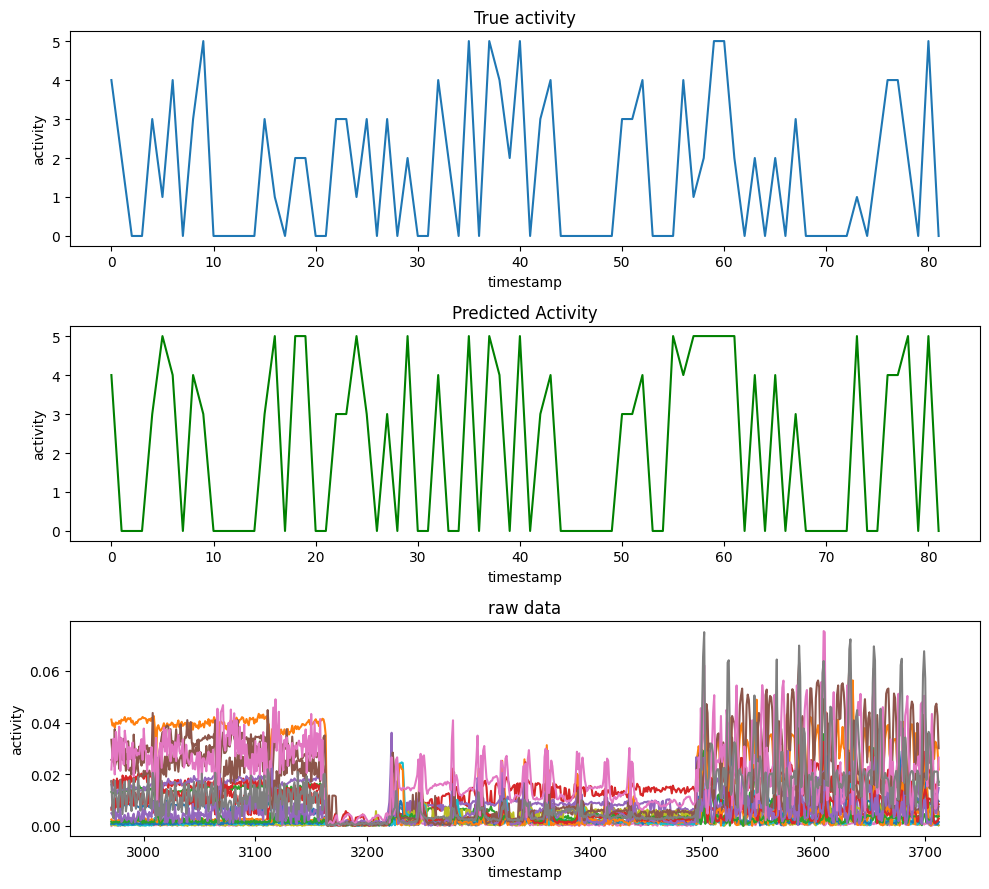

In [30]:

dd = X.iloc[2971:]

plt.figure(figsize=(10, 9)) 

# combined predicted activity
combined_true_labels = y_true_labels
combined_pred_labels = []

for pred_labels in y_pred_labels:
    if np.isscalar(pred_labels):
        pred_labels = np.array([pred_labels])
    combined_pred_labels.extend(pred_labels)

combined_pred_labels = np.array(combined_pred_labels)

# Subplot 1: True activity
plt.subplot(3, 1, 1) 
plt.plot(combined_true_labels)
plt.title("True activity")
plt.xlabel("timestamp")
plt.ylabel("activity")

# Subplot 2: predicted activity
plt.subplot(3, 1, 2) 
plt.plot(combined_pred_labels,color='green')
plt.title("Predicted Activity")
plt.xlabel("timestamp")
plt.ylabel("activity")

# Subplot 3: raw data
plt.subplot(3, 1, 3) 
plt.plot(dd)
plt.title("raw data")
plt.xlabel("timestamp")
plt.ylabel("activity")

plt.tight_layout()
plt.show()
